In [79]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [80]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [81]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [85]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]


In [86]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [87]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [88]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


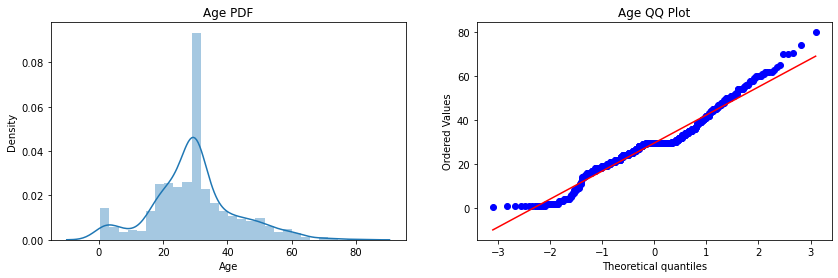

In [92]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


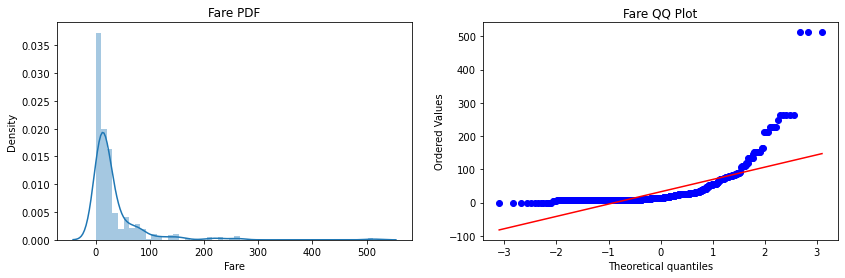

In [116]:
# plt.figure(figsize=(14,4))
# plt.subplot(121)
# sns.distplot(X_train['Fare'])
# plt.title("Fare pdf")

# plt.subplot(121)
# stats.probplot(X_train['Fare'],dist="norm",plot=plt)
# plt.title("Fare QQ chart")
# plt.show()


plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [104]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [107]:
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

In [113]:
print("LR -------->",accuracy_score(y_test,y_pred))
print("DT--------->",accuracy_score(y_test,y_pred1))

LR --------> 0.6480446927374302
DT---------> 0.659217877094972


In [117]:
trf = FunctionTransformer(np.log1p)

In [120]:
X_train_transform  = trf.fit_transform(X_train)
X_test_transform = trf.fit_transform(X_test)

In [122]:
clf.fit(X_train_transform,y_train)
clf2.fit(X_test_transform,y_test)

DecisionTreeClassifier()

In [125]:
y_pred = clf.predict(X_test_transform)
y_pred1 = clf.predict(X_train_transform)

In [126]:
print("LS--------------",accuracy_score(y_test,y_pred))
print("DT--------------",accuracy_score(y_test,y_pred1))

LS-------------- 0.6815642458100558


ValueError: Found input variables with inconsistent numbers of samples: [179, 712]